<a href="https://colab.research.google.com/github/souhirbenamor/EPF/blob/main/Evaluation_metrics_Bridging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gitpython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 181 kB 5.3 MB/s 
     |████████████████████████████████| 63 kB 1.2 MB/s 


In [2]:
import os
from git.repo.base import Repo
Repo.clone_from("https://github.com/jeslago/epftoolbox", "epftoolbox")

<git.repo.base.Repo '/content/epftoolbox/.git'>

In [3]:
cd epftoolbox

/content/epftoolbox


In [4]:
pip install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/epftoolbox
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 1.6 MB 5.0 MB/s 
     |████████████████████████████████| 9.8 MB 16.6 MB/s 
     |████████████████████████████████| 199 kB 7.4 MB/s 
  Created wheel for epftoolbox: filename=epftoolbox-1.0-py3-none-any.whl size=66419 sha256=82dc845f27c74dfe75d388be097aaa2b83c2cac8160543f1700f085f2566f11e
  Stored in directory: /tmp/pip-ephem-wheel-cache-390xbply/wheels/06/b5/e7/02ff8b49a8bcb96199cd1c61796efa62c3e0a1a6a30807e150
Successfully built e

In [5]:
from epftoolbox.evaluation import MAE
from epftoolbox.evaluation import RMSE
from epftoolbox.evaluation import MAPE
from epftoolbox.evaluation import sMAPE
from epftoolbox.evaluation import MASE
from epftoolbox.evaluation import rMAE
from epftoolbox.data import read_data
import pandas as pd

In [10]:
#Download available forecast
import pandas as pd
import numpy as np
forecast = pd.read_csv('/content/Forecasting Results.csv')
#forecast = forecast.set_index("Date") # define Date  as index
forecast.reset_index(inplace=True)
forecast["Date"] = pd.to_datetime(forecast["Date"])
forecast = forecast.set_index('Date')

forecast.head()

,index,Real Price,SARIMAX_Real,Lasso_Real,Radom Forest_Real,RF_GirdSearch_Real,XGBRegressor_Real,SARIMAX_Fund,Lasso_Fund,Radom Forest_Fund,...,SARIMAX_Real&Fund,Lasso_Real&Fund,Radom Forest_Real&Funda,RF GirdSearch_ Real&Fund,XGBRegressor_Real&Fund,SARIMAX_Real&Fund_only,Lasso Real&Fund_only,Radom Forest Real&Fundaonly,RF GirdSearch_Real&Fund_only,XGBRegressor_Real&Fund_only
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-28 00:00:00,0,50.00,39.124020,48.926566,32.852,30.60762,31.298906,42.222328,47.304833,33.562678,...,46.200912,49.917706,31.4320,31.4320,32.431156,41.859925,48.358913,33.2895,33.04646,33.84728
2014-12-28 01:00:00,1,49.19,38.011127,48.062147,32.852,30.53710,31.075777,41.490764,46.736033,33.562678,...,45.252480,49.366629,31.4320,31.4320,32.431156,41.741843,48.358913,32.7210,30.43282,33.84728
2014-12-28 02:00:00,2,48.51,38.213906,48.310855,33.646,30.05446,31.298906,41.645051,46.893013,33.562678,...,45.466920,49.527285,30.0080,30.0080,32.431156,41.623857,48.358913,31.8580,28.33394,33.84728
2014-12-28 03:00:00,3,48.07,39.981883,49.908843,33.646,31.12084,32.254292,42.822272,47.908377,33.562678,...,47.069052,50.557403,29.5940,29.5940,32.431156,41.505965,48.358913,32.7520,30.82554,33.84728
2014-12-28 04:00:00,4,49.82,43.612825,53.125098,34.684,34.74330,33.420540,45.201856,49.942965,33.562678,...,50.324983,52.633557,30.8975,30.8975,32.503632,41.388169,48.358913,32.0730,33.49038,33.84728


In [13]:
# Transforming indices to datetime format
#forecast.index = pd.to_datetime(forecast.index)
# Extracting forecast 
fc_GARMA = forecast.iloc[:, 3]
# Extracting real price and display
real_price = forecast.iloc[:, 1]

In [14]:
fc_GARMA

Date
2014-12-28 00:00:00    48.926566
2014-12-28 01:00:00    48.062147
2014-12-28 02:00:00    48.310855
2014-12-28 03:00:00    49.908843
2014-12-28 04:00:00    53.125098
                         ...    
2016-12-31 19:00:00    57.853172
2016-12-31 20:00:00    56.638409
2016-12-31 21:00:00    57.297578
2016-12-31 22:00:00    56.226210
2016-12-31 23:00:00    30.826500
Name: Lasso_Real, Length: 17640, dtype: float64

In [15]:
real_price

Date
2014-12-28 00:00:00    50.00
2014-12-28 01:00:00    49.19
2014-12-28 02:00:00    48.51
2014-12-28 03:00:00    48.07
2014-12-28 04:00:00    49.82
                       ...  
2016-12-31 19:00:00    56.70
2016-12-31 20:00:00    52.44
2016-12-31 21:00:00    51.86
2016-12-31 22:00:00    52.26
2016-12-31 23:00:00    50.87
Name: Real Price, Length: 17640, dtype: float64

In [16]:
MAE(p_pred=fc_GARMA, p_real=real_price)

8.576128636986962

In [17]:
RMSE(p_pred=fc_GARMA, p_real=real_price)

10.976617266890493

In [18]:
MAPE(p_pred=fc_GARMA, p_real=real_price)

5.257342739329784

In [19]:
sMAPE(p_pred=fc_GARMA, p_real=real_price)

0.29883734706227577

In [20]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/Electricity_real.csv')
#df = df.set_index("Date") # define Date  as index
#df.index = pd.to_datetime(df.index)
df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df.head()

,index,price day ahead real
Date,,
2011-01-09 00:00:00,0,18.29
2011-01-09 01:00:00,1,16.04
2011-01-09 02:00:00,2,14.60
2011-01-09 03:00:00,3,14.95
2011-01-09 04:00:00,4,14.50


In [21]:
#Consider the train sample
y_train = df[:-17640] 
real_price_insample =y_train.iloc[:, 1]
real_price_insample=pd.DataFrame(real_price_insample)
real_price_insample

,price day ahead real
Date,
2011-01-09 00:00:00,18.29
2011-01-09 01:00:00,16.04
2011-01-09 02:00:00,14.60
2011-01-09 03:00:00,14.95
2011-01-09 04:00:00,14.50
...,...
2014-12-27 19:00:00,66.96
2014-12-27 20:00:00,55.58
2014-12-27 21:00:00,51.63


In [ ]:
#y_test = df[-17472:]
#y_test

In [22]:
from epftoolbox.evaluation import naive_forecast

In [23]:
naive_forecast(p_real=real_price_insample, m='W', n_prices_day=24)

,price day ahead real
Date,
2011-01-16 00:00:00,18.29
2011-01-16 01:00:00,16.04
2011-01-16 02:00:00,14.6
2011-01-16 03:00:00,14.95
2011-01-16 04:00:00,14.5
...,...
2014-12-27 19:00:00,69.99
2014-12-27 20:00:00,61.9
2014-12-27 21:00:00,52.6


In [24]:
MASE(p_pred=fc_GARMA, p_real=real_price, p_real_in=real_price_insample, m='W')

0.9002031258267761

In [25]:
rMAE(p_pred=fc_GARMA, p_real=real_price)

0.8515190537561095

# **Diebold-Mariano **

In [103]:
from epftoolbox.evaluation import DM, plot_multivariate_DM_test
from epftoolbox.data import read_data
import pandas as pd

In [104]:
 # Generating forecasts of multiple models
 # Download available forecast of the NP market available in the library repository
 # These forecasts accompany the original paper
forecasts = pd.read_csv('/content/Forecasting Results_DW.csv', index_col=0)
forecasts

,Real Price,Lasso 1,RF 1,XGBReg 1,Lasso 2,RF 2,XGBReg 2,Lasso 3,RF 3,XGBReg 3,Lasso 4,RF 4,XGBReg 4
Date,,,,,,,,,,,,,
12/28/2014 0:00,50.00,48.926566,30.607620,31.298906,47.304833,36.906499,30.307123,49.917706,31.43200,32.431156,48.358913,33.04646,33.84728
12/28/2014 1:00,49.19,48.062147,30.537100,31.075777,46.736033,36.464805,30.236479,49.366629,31.43200,32.431156,48.358913,30.43282,33.84728
12/28/2014 2:00,48.51,48.310855,30.054460,31.298906,46.893013,36.059168,30.236479,49.527285,30.00800,32.431156,48.358913,28.33394,33.84728
12/28/2014 3:00,48.07,49.908843,31.120840,32.254292,47.908377,36.577392,30.473997,50.557403,29.59400,32.431156,48.358913,30.82554,33.84728
12/28/2014 4:00,49.82,53.125098,34.743300,33.420540,49.942965,38.260990,30.555321,52.633557,30.89750,32.503632,48.358913,33.49038,33.84728
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/31/2016 19:00,56.70,57.853172,35.471100,33.349937,52.051058,38.418771,30.764866,65.498077,32.29900,37.765488,59.289372,52.08700,41.35512
12/31/2016 20:00,52.44,56.638409,33.070080,32.578724,51.150343,36.890724,30.554470,61.323407,32.29900,34.035461,52.188683,48.32964,34.22145
12/31/2016 21:00,51.86,57.297578,31.964820,32.578724,51.477449,36.284577,30.554470,61.777226,32.29900,34.035461,52.188683,45.72386,34.22145


In [105]:
# Deleting the real price field as it the actual real price and not a forecast
del forecasts['Real Price']

forecasts

,Lasso 1,RF 1,XGBReg 1,Lasso 2,RF 2,XGBReg 2,Lasso 3,RF 3,XGBReg 3,Lasso 4,RF 4,XGBReg 4
Date,,,,,,,,,,,,
12/28/2014 0:00,48.926566,30.607620,31.298906,47.304833,36.906499,30.307123,49.917706,31.43200,32.431156,48.358913,33.04646,33.84728
12/28/2014 1:00,48.062147,30.537100,31.075777,46.736033,36.464805,30.236479,49.366629,31.43200,32.431156,48.358913,30.43282,33.84728
12/28/2014 2:00,48.310855,30.054460,31.298906,46.893013,36.059168,30.236479,49.527285,30.00800,32.431156,48.358913,28.33394,33.84728
12/28/2014 3:00,49.908843,31.120840,32.254292,47.908377,36.577392,30.473997,50.557403,29.59400,32.431156,48.358913,30.82554,33.84728
12/28/2014 4:00,53.125098,34.743300,33.420540,49.942965,38.260990,30.555321,52.633557,30.89750,32.503632,48.358913,33.49038,33.84728
...,...,...,...,...,...,...,...,...,...,...,...,...
12/31/2016 19:00,57.853172,35.471100,33.349937,52.051058,38.418771,30.764866,65.498077,32.29900,37.765488,59.289372,52.08700,41.35512
12/31/2016 20:00,56.638409,33.070080,32.578724,51.150343,36.890724,30.554470,61.323407,32.29900,34.035461,52.188683,48.32964,34.22145
12/31/2016 21:00,57.297578,31.964820,32.578724,51.477449,36.284577,30.554470,61.777226,32.29900,34.035461,52.188683,45.72386,34.22145


In [106]:
# Transforming indices to datetime format
forecasts.index = pd.to_datetime(forecasts.index)
forecasts

,Lasso 1,RF 1,XGBReg 1,Lasso 2,RF 2,XGBReg 2,Lasso 3,RF 3,XGBReg 3,Lasso 4,RF 4,XGBReg 4
Date,,,,,,,,,,,,
2014-12-28 00:00:00,48.926566,30.607620,31.298906,47.304833,36.906499,30.307123,49.917706,31.43200,32.431156,48.358913,33.04646,33.84728
2014-12-28 01:00:00,48.062147,30.537100,31.075777,46.736033,36.464805,30.236479,49.366629,31.43200,32.431156,48.358913,30.43282,33.84728
2014-12-28 02:00:00,48.310855,30.054460,31.298906,46.893013,36.059168,30.236479,49.527285,30.00800,32.431156,48.358913,28.33394,33.84728
2014-12-28 03:00:00,49.908843,31.120840,32.254292,47.908377,36.577392,30.473997,50.557403,29.59400,32.431156,48.358913,30.82554,33.84728
2014-12-28 04:00:00,53.125098,34.743300,33.420540,49.942965,38.260990,30.555321,52.633557,30.89750,32.503632,48.358913,33.49038,33.84728
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,57.853172,35.471100,33.349937,52.051058,38.418771,30.764866,65.498077,32.29900,37.765488,59.289372,52.08700,41.35512
2016-12-31 20:00:00,56.638409,33.070080,32.578724,51.150343,36.890724,30.554470,61.323407,32.29900,34.035461,52.188683,48.32964,34.22145
2016-12-31 21:00:00,57.297578,31.964820,32.578724,51.477449,36.284577,30.554470,61.777226,32.29900,34.035461,52.188683,45.72386,34.22145


In [107]:
#Extracting the real prices from the market
df = pd.read_csv('/content/Electricity_real.csv',index_col=0)
df.index = pd.to_datetime(df.index)
df

,price day ahead real
Date,
2011-01-09 00:00:00,18.29
2011-01-09 01:00:00,16.04
2011-01-09 02:00:00,14.60
2011-01-09 03:00:00,14.95
2011-01-09 04:00:00,14.50
...,...
2016-12-31 19:00:00,56.70
2016-12-31 20:00:00,52.44
2016-12-31 21:00:00,51.86


In [108]:
y_test = df[-17640:]
real_price = y_test.loc[:, ['price day ahead real']]

In [109]:
real_price

,price day ahead real
Date,
2014-12-28 00:00:00,50.00
2014-12-28 01:00:00,49.19
2014-12-28 02:00:00,48.51
2014-12-28 03:00:00,48.07
2014-12-28 04:00:00,49.82
...,...
2016-12-31 19:00:00,56.70
2016-12-31 20:00:00,52.44
2016-12-31 21:00:00,51.86


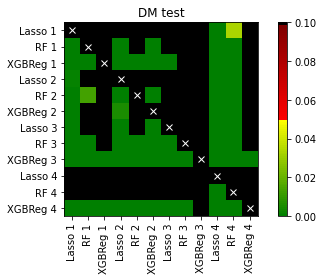

In [110]:
# Generating a plot to compare the models using the multivariate DM test
plt=plot_multivariate_DM_test(real_price=real_price, forecasts=forecasts) 

In [76]:
 DM(p_real=real_price.values.reshape(-1, 24),
...     p_pred_1=forecasts.loc[:, 'XGBRegressor_Fund'].values.reshape(-1, 24),
...     p_pred_2=forecasts.loc[:, 'RF_GirdSearch_Fund'].values.reshape(-1, 24),
...     norm=1, version='univariate')

array([9.99999999e-01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       9.99995911e-01, 9.99999581e-01, 9.99999754e-01, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 9.99999999e-01, 9.97976228e-01,
       3.34425438e-02, 1.68626046e-09, 2.38253861e-13, 9.00474900e-07,
       1.38939287e-02, 4.28467033e-01, 9.99917207e-01, 9.98994832e-01])

In [77]:
DM(p_real=real_price.values.reshape(-1, 24),
...     p_pred_1=forecasts.loc[:, 'XGBRegressor_Fund'].values.reshape(-1, 24),
...     p_pred_2=forecasts.loc[:, 'RF_GirdSearch_Fund'].values.reshape(-1, 24),
...     norm=1, version='multivariate')

0.9999999978641126